In [1]:
!rm -rf /usr/lib/python3.7/test

In [2]:
!git clone https://github.com/JaidedAI/EasyOCR

Cloning into 'EasyOCR'...
remote: Enumerating objects: 2487, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 2487 (delta 8), reused 33 (delta 6), pack-reused 2441
Receiving objects: 100% (2487/2487), 148.72 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (1473/1473), done.
Checking out files: 100% (301/301), done.


In [3]:
%cd EasyOCR/trainer

/content/EasyOCR/trainer


In [4]:
!gdown 1BdlVXPag6bK00idpZChVaJ9vrlKtiGeO -O config_files/

Downloading...
From: https://drive.google.com/uc?id=1BdlVXPag6bK00idpZChVaJ9vrlKtiGeO
To: /content/EasyOCR/trainer/config_files/ru_filtered_config.yaml
100% 1.16k/1.16k [00:00<00:00, 2.07MB/s]


In [5]:
!gdown 1GnSCsx96V55JF12niiwv2-lEZ3HxHCpo
!unzip ru_filtered.zip -d all_data/ > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1GnSCsx96V55JF12niiwv2-lEZ3HxHCpo
To: /content/EasyOCR/trainer/ru_filtered.zip
100% 1.33G/1.33G [00:31<00:00, 42.6MB/s]


In [6]:
!gdown 1z0l0cMJJkQvoWUE6nizZNIqqzoaTVEP7 -O saved_models/ru_filtered/

Downloading...
From: https://drive.google.com/uc?id=1z0l0cMJJkQvoWUE6nizZNIqqzoaTVEP7
To: /content/EasyOCR/trainer/saved_models/ru_filtered/english_g2.pth
100% 15.1M/15.1M [00:00<00:00, 32.0MB/s]


In [7]:
import os
import yaml
import torch
import pandas as pd
import torch.backends.cudnn as cudnn
from utils import AttrDict
from train import train

In [8]:
def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
    else:
        opt.character = opt.number + opt.symbol + opt.lang_char
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt

# Training

In [14]:
opt = get_config("config_files/ru_filtered_config.yaml")

In [ ]:
def create_csv(path):
    filename = f"{path}/labels.csv"
    if os.path.exists(filename):
        os.remove(filename)
    df = pd.DataFrame(data={"filename": os.listdir(path)})
    df["words"] = df["filename"].str[:-4]
    df["words"] = df["words"].str.replace("_0", "")
    df.to_csv(filename, index=False)
    print(filename)

for path in ["all_data/ru_filtered/ru_train_filtered", "all_data/ru_filtered/ru_val"]:
    create_csv(path)

all_data/ru_filtered/ru_train_filtered/labels.csv
all_data/ru_filtered/ru_val/labels.csv


In [ ]:
train(opt, amp=False)

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: all_data
opt.select_data: ['train']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    all_data	 dataset: train
all_data/ru_filtered/ru_train_filtered
sub-directory:	/ru_filtered/ru_train_filtered	 num samples: 44140
num total samples of train: 44140 x 1.0 (total_data_usage_ratio) = 44140
num samples of train per batch: 32 x 1.0 (batch_ratio) = 32


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


--------------------------------------------------------------------------------
Total_batch_size: 32 = 32
--------------------------------------------------------------------------------
dataset_root:    all_data/ru_filtered/ru_val	 dataset: /
all_data/ru_filtered/ru_val/
sub-directory:	/.	 num samples: 4890
--------------------------------------------------------------------------------
No Transformation module specified
model input parameters 50 250 20 1 256 256 35 34 None VGG BiLSTM CTC
Model:
DataParallel(
  (module): Model(
    (FeatureExtraction): VGG_FeatureExtractor(
      (ConvNet): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mod

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from datetime import datetime
now = datetime.now().strftime("%Y.%m.%d-%I:%M:%S")
root = "/content/drive/MyDrive/EasyOCR"
path = f"{root}/models/{now}/"
path

'/content/drive/MyDrive/EasyOCR/models/2022.10.09-10:11:02/'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!mkdir -p $path
!cp -r saved_models/ru_filtered $path
!cp config_files/ru_filtered_config.yaml $path/ru_filtered_config.yaml

# Inference

In [9]:
!gdown --folder 1jfb79ypDfmbJ4OMcRf88hUrL2Bvr19Mn

Retrieving folder list
Processing file 1U4DRjq1G2FwYQ1SxNt6bAuF7BxHWPaoZ custom_model.pth
Processing file 1oMsN2nN1-U_7h6IKdAKxoEeZntEAVeV7 custom_model.py
Processing file 1X8RUz6G48ugehzfXMjtKZbRpcYz593iQ custom_model.yaml
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1U4DRjq1G2FwYQ1SxNt6bAuF7BxHWPaoZ
To: /content/EasyOCR/trainer/custom_model.pth
100% 15.1M/15.1M [00:00<00:00, 28.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oMsN2nN1-U_7h6IKdAKxoEeZntEAVeV7
To: /content/EasyOCR/trainer/custom_model.py
100% 3.48k/3.48k [00:00<00:00, 11.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X8RUz6G48ugehzfXMjtKZbRpcYz593iQ
To: /content/EasyOCR/trainer/custom_model.yaml
100% 165/165 [00:00<00:00, 418kB/s]
Download completed


In [20]:
!mkdir -p ~/.EasyOCR/user_network
!cp custom_model.py ~/.EasyOCR/user_network/custom_model.py
!cp custom_model.yaml ~/.EasyOCR/user_network/custom_model.yaml
!mkdir -p ~/.EasyOCR/model
!cp custom_model.pth ~/.EasyOCR/model/custom_model.pth

In [11]:
!pip install easyocr > /dev/null

In [12]:
import easyocr
from PIL import Image, ImageFont, ImageDraw
from skimage import io

In [21]:
reader = easyocr.Reader(['en'], recog_network='custom_model')

In [22]:
image = io.imread("https://5koleso.ru/wp-content/uploads/2022/01/img_5769-1024x683.jpg")
result = reader.readtext(image)

In [23]:
def coords_to_bbox(coords):
    x_min = min(coords, key=lambda x: x[0])[0]
    y_min = min(coords, key=lambda x: x[1])[1]
    x_max = max(coords, key=lambda x: x[0])[0]
    y_max = max(coords, key=lambda x: x[1])[1]
    return (x_min, y_min), (x_max, y_max)

In [24]:
numberplate = max(result, key=lambda x:x[2])
coords, content, _ = numberplate
bbox = coords_to_bbox(coords)
bbox, content

(((305, 489), (443, 525)), 'K951YK198')

In [25]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

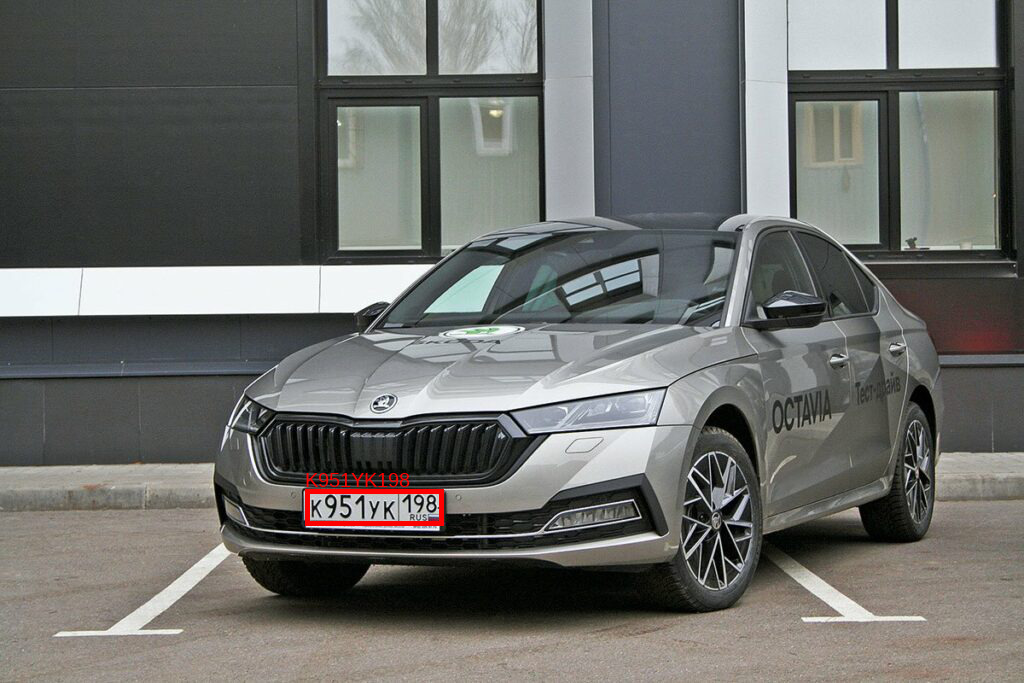

In [26]:
output = Image.fromarray(image)
out_draw = ImageDraw.Draw(output)
out_draw.rectangle(bbox, outline="red", width=5)
font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/LiberationSans-Regular.ttf", size=20)
font_h = font.getsize("content")[1] + 2
x, y = bbox[0]
out_draw.text((x, y - font_h), content, font=font, fill="red")
output

In [27]:
!gdown 1wcVSOmIFJnTUdUOroIXwKsQOjiC4ZoeX
!gdown 1Gmj6w58GXCQmzbJBL9urYOg3wl8ldpUz

Downloading...
From: https://drive.google.com/uc?id=1wcVSOmIFJnTUdUOroIXwKsQOjiC4ZoeX
To: /content/EasyOCR/trainer/en_filtered_config.yaml
100% 1.08k/1.08k [00:00<00:00, 2.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gmj6w58GXCQmzbJBL9urYOg3wl8ldpUz
To: /content/EasyOCR/trainer/english_g2.pth
100% 15.1M/15.1M [00:00<00:00, 189MB/s]


In [28]:
opt = get_config("en_filtered_config.yaml")

In [46]:
from model import Model
from utils import CTCLabelConverter
from dataset import hierarchical_dataset, AlignCollate, Batch_Balanced_Dataset
from test import validation

In [35]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
converter = CTCLabelConverter(opt.character)
opt.num_class = len(converter.character)
model = Model(opt)
model = torch.nn.DataParallel(model)
pretrained_dict = torch.load("english_g2.pth")
model.load_state_dict(pretrained_dict)
model.train()

No Transformation module specified


DataParallel(
  (module): Model(
    (FeatureExtraction): VGG_FeatureExtractor(
      (ConvNet): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace=True)
        (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace=True)
        (10): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
        (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_r

In [44]:
valid_dataset, _ = hierarchical_dataset(root="all_data/ru_filtered/ru_val", opt=opt)
AlignCollate_valid = AlignCollate(imgH=opt.imgH, imgW=opt.imgW, keep_ratio_with_pad=opt.PAD, contrast_adjust=opt.contrast_adjust)

dataset_root:    all_data/ru_filtered/ru_val	 dataset: /
all_data/ru_filtered/ru_val/
sub-directory:	/.	 num samples: 4893


In [45]:
valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=min(32, opt.batch_size),
    shuffle=True,
    num_workers=int(opt.workers), prefetch_factor=512,
    collate_fn=AlignCollate_valid, pin_memory=True
)

In [36]:
criterion = torch.nn.CTCLoss(zero_infinity=True).to(device)

In [48]:
valid_loss, current_accuracy, current_norm_ED, preds, confidence_score, labels,\
infer_time, length_of_data = validation(model, criterion, valid_loader, converter, opt, device)

In [49]:
current_accuracy, current_norm_ED

(0.22481095442468832, 0.48308360548550633)